                               Price
Category                            
패션의류 > 여성의류 > 니트/스웨터    33042.500000
패션의류 > 여성의류 > 레깅스       15966.666667
패션의류 > 여성의류 > 바지        33934.545455
패션의류 > 여성의류 > 블라우스/셔츠   29116.666667
패션의류 > 여성의류 > 스커트       14833.333333
패션의류 > 여성의류 > 원피스       41365.714286
패션의류 > 여성의류 > 재킷        65544.545455
패션의류 > 여성의류 > 점퍼       244121.600000
패션의류 > 여성의류 > 조끼        27573.333333
패션의류 > 여성의류 > 청바지       26450.000000
패션의류 > 여성의류 > 카디건       68950.000000
패션의류 > 여성의류 > 코디세트      61412.500000
패션의류 > 여성의류 > 코트       159085.000000
패션의류 > 여성의류 > 트레이닝복     43261.666667
패션의류 > 여성의류 > 티셔츠       44048.888889
패션의류 > 여성의류 > 파티복       49000.000000
                                Name           Category   Price
0           따뜻한 와이드 슬랙스 부츠컷 팬츠 (롱/숏)   패션의류 > 여성의류 > 바지   37000
1           부드럽고 따뜻한 조거 트랙팬츠(4color)   패션의류 > 여성의류 > 바지   39000
2                      [휠라공식]에이스 롱다운   패션의류 > 여성의류 > 점퍼  195300
3                  나인츠 여성 다운 패딩 야상점퍼   패션의류 > 여성의류 > 점퍼   49000
4         지오다노

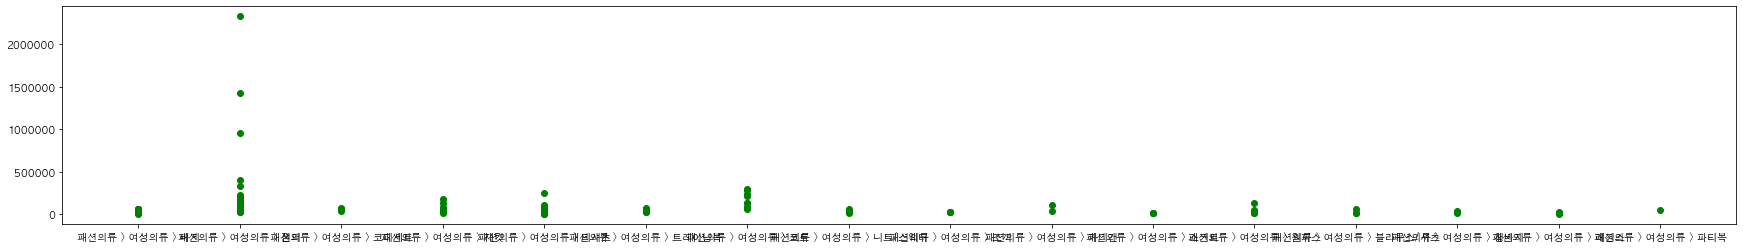

In [8]:
import matplotlib
import requests
import re
import datetime
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
import platform

rc('font', family='AppleGothic')
    
plt.rcParams["figure.figsize"] = (30,4)

shoppingPage_head = "https://search.shopping.naver.com/search/all?frm=NVSHATC&origQuery=%EC%97%AC%EC%84%B1%EC%9D%98%EB%A5%98&pagingIndex="
shoppingPage_tail = "&pagingSize=40&productSet=total&query=%EC%97%AC%EC%84%B1%EC%9D%98%EB%A5%98&sort=rel&timestamp=&viewType=list"
shoppingList = []
mallNameList = []
categoryList = []
categoryListReal = []
priceList = []
reviewNumList = []

# 1~30페이지 까지 링크 생성
for i in range(30):
    shoppingList.append(shoppingPage_head+str(i)+shoppingPage_tail)

# 상품명 판매가 카테고리 리뷰갯수 GET
for i in range(30):
    resForName = requests.get(shoppingList[i])
    soupForName = BeautifulSoup(resForName.content, 'html.parser')
    for j in range(5):
        mallNameList.append(soupForName.find_all(class_='basicList_link__1MaTN')[j].get_text())
        priceList.append(soupForName.find_all(class_='price_num__2WUXn')[j].get_text())
        reviewNumList.append(soupForName.find_all('em',class_='basicList_num__1yXM9')[j].get_text())

    for j in range(15):
        categoryList.append(soupForName.find_all(class_='basicList_category__wVevj')[j].get_text())

cutCounter = 0
strCategory = ""

# 카테고리 취합부
for i in range(len(categoryList)):
    strCategory += categoryList[i]
    cutCounter += 1
    if cutCounter == 1 or cutCounter == 2:
        strCategory += " > "
    if cutCounter == 3:
        cutCounter = 0
        categoryListReal.append(strCategory)
        strCategory = ""

for i in range(len(priceList)):
    priceList[i] = priceList[i][:-1]
    priceList[i] = priceList[i].replace(",", "")
    priceList[i] = int(priceList[i])


df = pd.DataFrame({'Name':mallNameList,
                   'Category':categoryListReal,
                    'Price':priceList,
                             })

print(df.groupby('Category').mean())
print(df)


plt.plot(categoryListReal, priceList, 'go')
plt.show()
